In [1]:
import typing as tp
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration

plt.gray()

<Figure size 640x480 with 0 Axes>

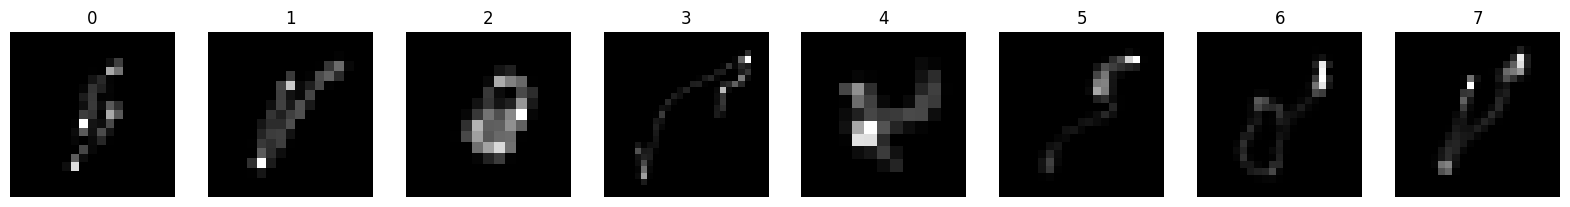

In [2]:
files = sorted(list(Path('/home/chaganovaob/edu/neural-deconvolution/datasets/levin/Levin09blurdata/').rglob('*.mat')))
psfs = []
ys = []

fig, axs = plt.subplots(1, 8, figsize=(20,10))
for i in range(8):
    img = scipy.io.loadmat(files[i])
    x = img['x']
    y = img['y']
    psf = img['f']
    ys.append(y)
    psfs.append(psf)
    axs[i].imshow(psf)
    axs[i].axis('off')
    axs[i].set_title(i)


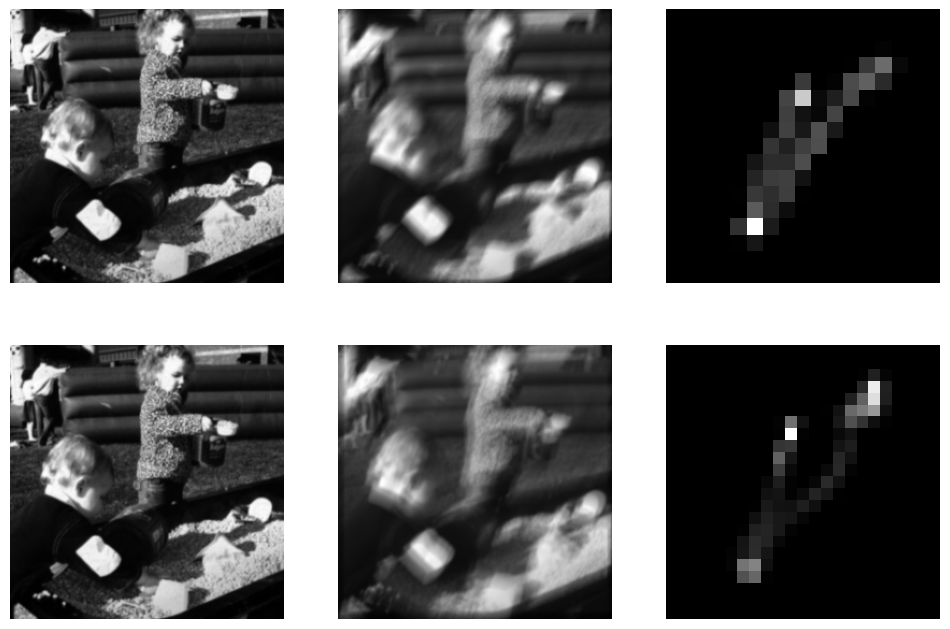

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

psf_1 = psfs[1]
blurred_1 = conv2(x, psf_1, 'same')
axs[0, 0].imshow(x)
axs[0, 0].axis('off')
axs[0, 1].imshow(blurred_1)
axs[0, 1].axis('off')
axs[0, 2].imshow(psf_1)
axs[0, 2].axis('off')

psf_7 = psfs[7]
blurred_7 = conv2(x, psf_7, 'same')
axs[1, 0].imshow(x)
axs[1, 0].axis('off')
axs[1, 1].imshow(blurred_7)
axs[1, 1].axis('off')
axs[1, 2].imshow(psf_7)
axs[1, 2].axis('off')

plt.show()

# 1 Classical algorithmns

In [4]:
def deblur_and_show(
    sharp_image: np.array,
    blurred_image: np.array,
    psf: np.array,
    psf_true: np.array,
    algorithm: tp.Callable,
    **algo_params,
):
    restored = algorithm(
        image=blurred_image,
        psf=psf,
        **algo_params,
    )

    try:
        ncols = 4 if np.allclose(psf, psf_true) else 5
    except: 
        ncols = 5

    fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(ncols*4, 5))

    for a in ax:
        a.axis('off')

    ax[0].imshow(blurred_1)
    ax[0].set_title('Original')

    ax[1].imshow(restored, vmin=restored.min(), vmax=restored.max())
    ax[1].set_title('Deconvolved')

    ax[2].imshow(sharp_image)
    ax[2].set_title('Sharp')

    ax[3].imshow(psf)
    ax[3].set_title('PSF')

    if ncols > 4:
        ax[4].imshow(psf_true)
        ax[4].set_title('True PSF')



## Lucy-Richardson

### Correct PSF

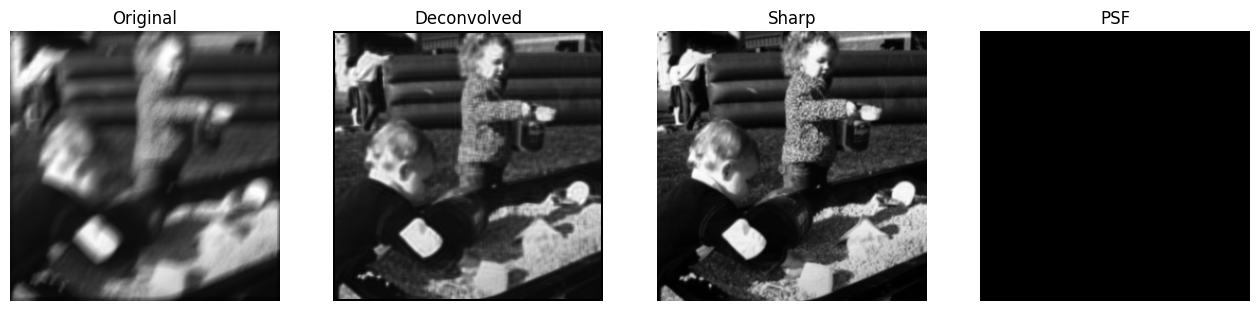

In [5]:
psf_uniform3 = np.ones((5, 5)) / 25
blurred_uniform3 = conv2(x, psf_uniform3)

deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_uniform3,
    psf=psf_uniform3,
    psf_true=psf_uniform3,
    num_iter=40,
    algorithm=restoration.richardson_lucy,
)

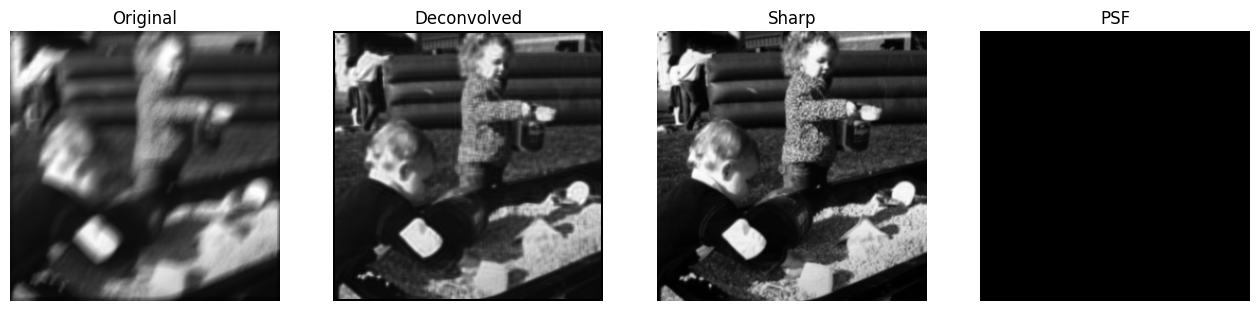

In [6]:
psf_uniform5 = np.ones((5, 5)) / 25

blurred_uniform5 = conv2(x, psf_uniform5)

deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_uniform5,
    psf=psf_uniform5,
    psf_true=psf_uniform5,
    num_iter=40,
    algorithm=restoration.richardson_lucy,
)

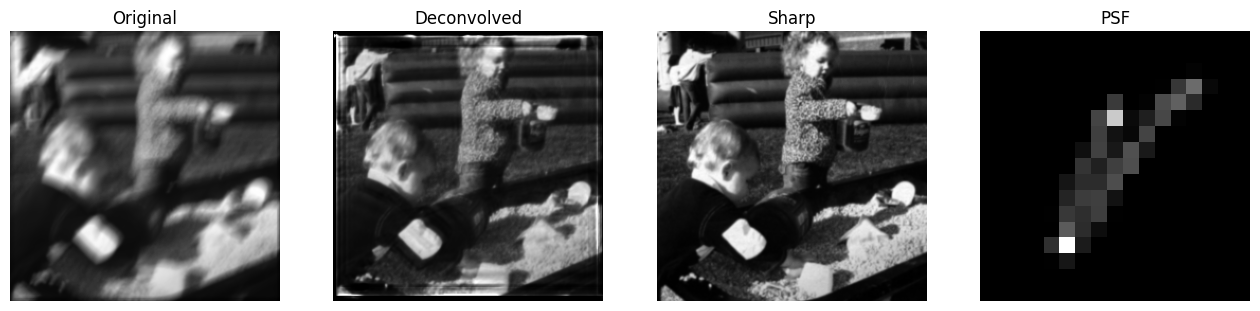

In [7]:
deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_1,
    psf=psf_1,
    psf_true=psf_1,
    num_iter=40,
    algorithm=restoration.richardson_lucy,
)

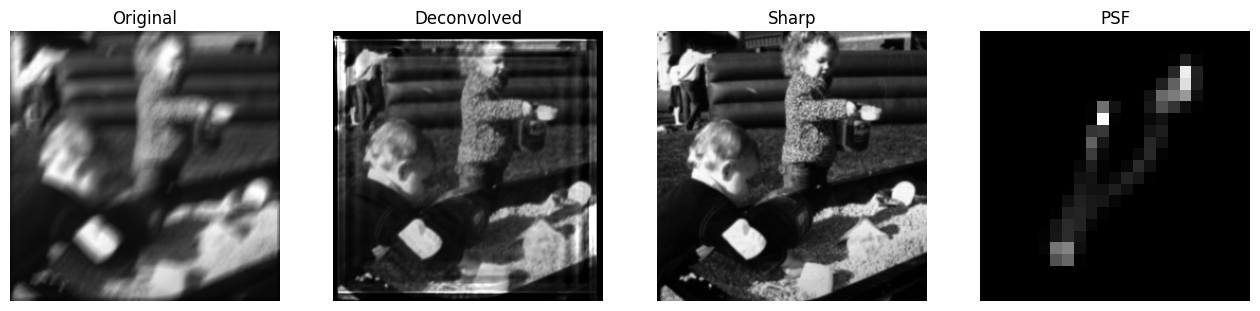

In [8]:
deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_7,
    psf=psf_7,
    psf_true=psf_7,
    num_iter=40,
    algorithm=restoration.richardson_lucy,
)

### Incorrect PSF

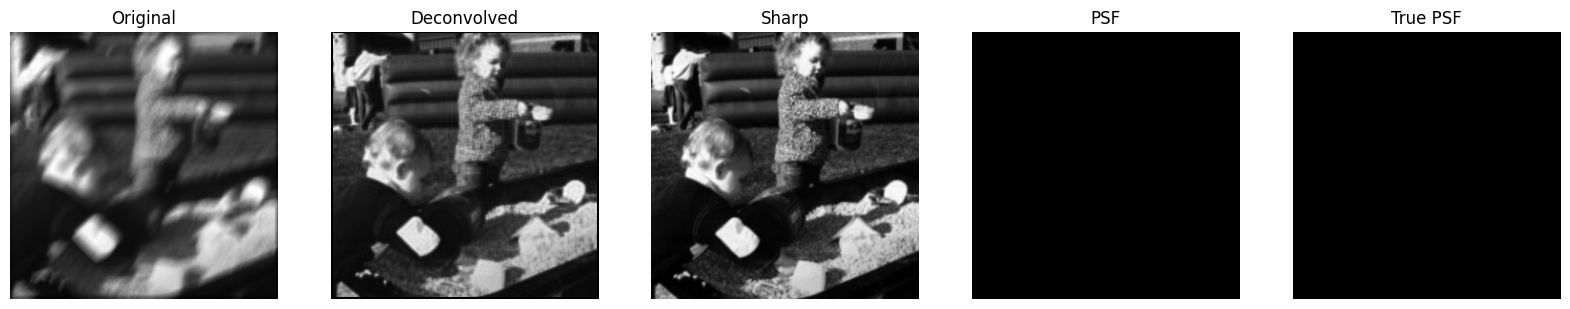

In [19]:
psf_uniform3 = np.ones((3, 3)) / 9

deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_uniform3,
    psf=psf_uniform5,
    psf_true=psf_uniform3,
    num_iter=100,
    algorithm=restoration.richardson_lucy,
)

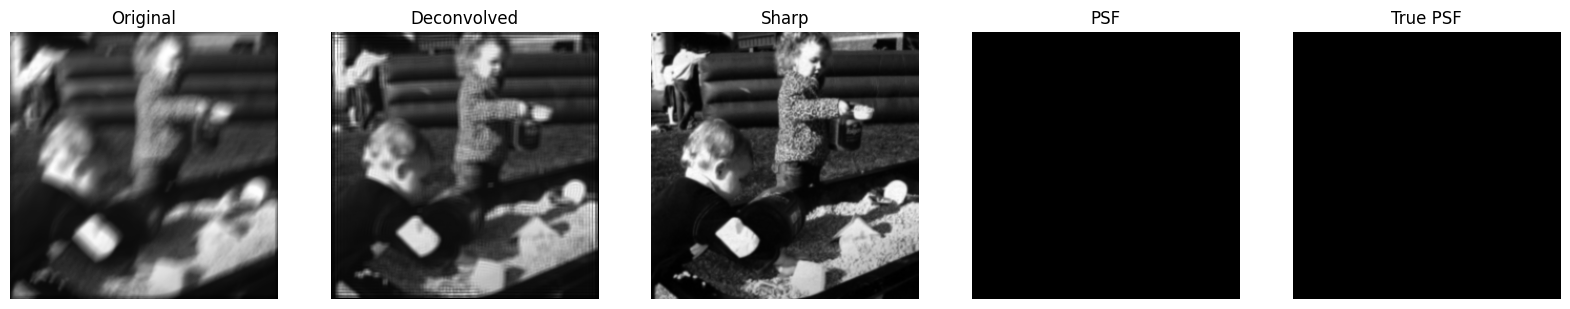

In [20]:
psf_uniform3 = np.ones((3, 3)) / 9

deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_uniform5,
    psf=psf_uniform3,
    psf_true=psf_uniform5,
    num_iter=100,
    algorithm=restoration.richardson_lucy,
)

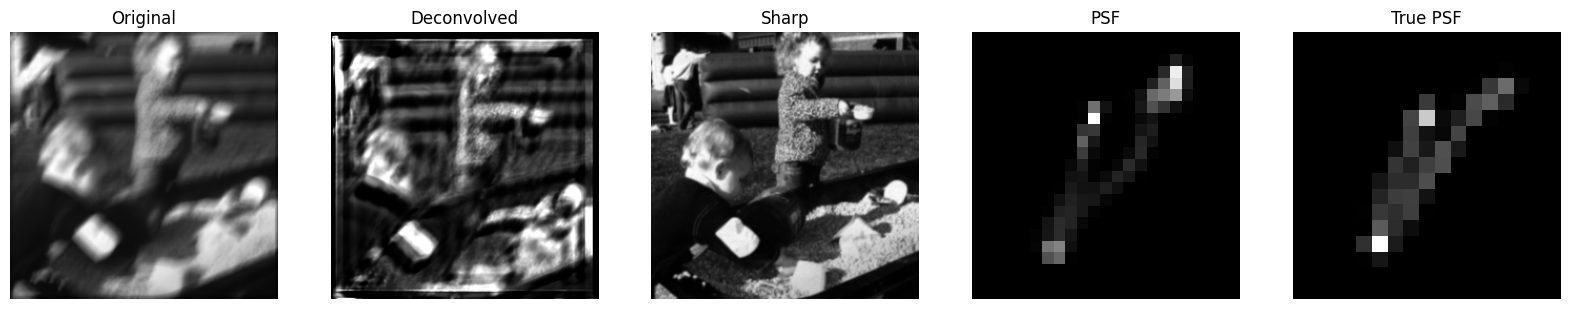

In [21]:
deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_1,
    psf=psf_7,
    psf_true=psf_1,
    num_iter=40,
    algorithm=restoration.richardson_lucy,
)

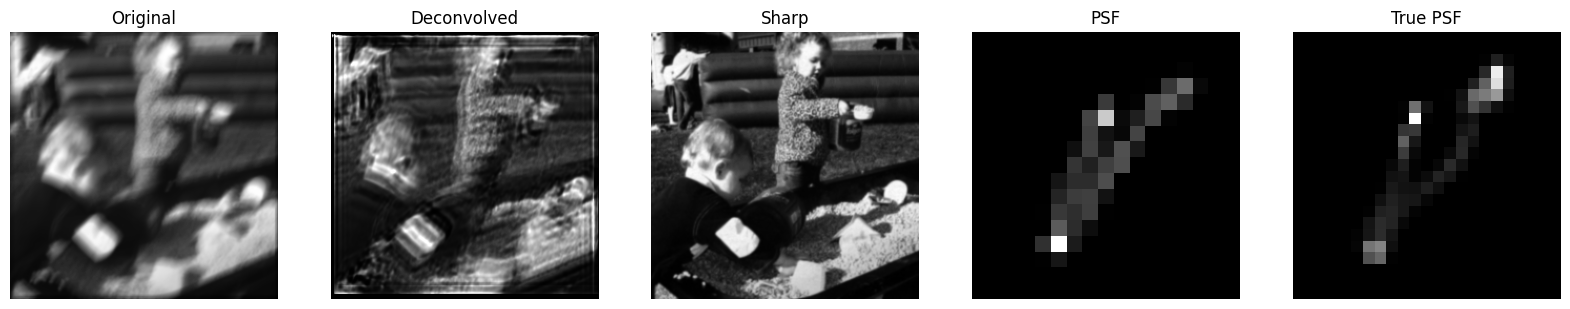

In [22]:
deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_7,
    psf=psf_1,
    psf_true=psf_7,
    num_iter=40,
    algorithm=restoration.richardson_lucy,
)

## Wiener

### Correct PSF

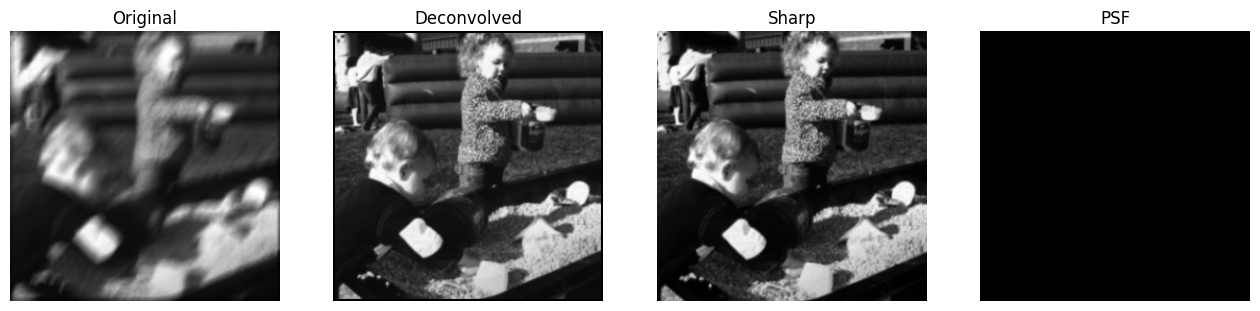

In [ ]:
deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_uniform3,
    psf=psf_uniform3,
    psf_true=psf_uniform3,
    algorithm=restoration.wiener,
    balance=0,
)

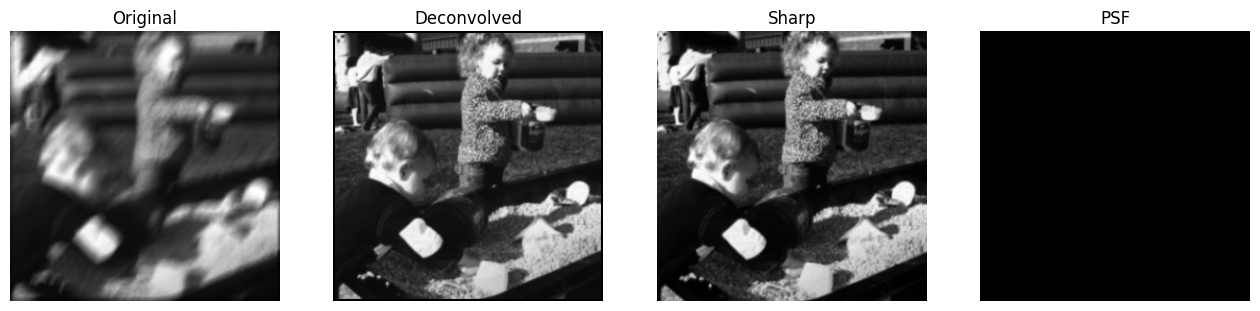

In [ ]:
psf_uniform5 = np.ones((5, 5)) / 25

blurred_uniform5 = conv2(x, psf_uniform5)

deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_uniform5,
    psf=psf_uniform5,
    psf_true=psf_uniform5,
    algorithm=restoration.wiener,
    balance=0,
)

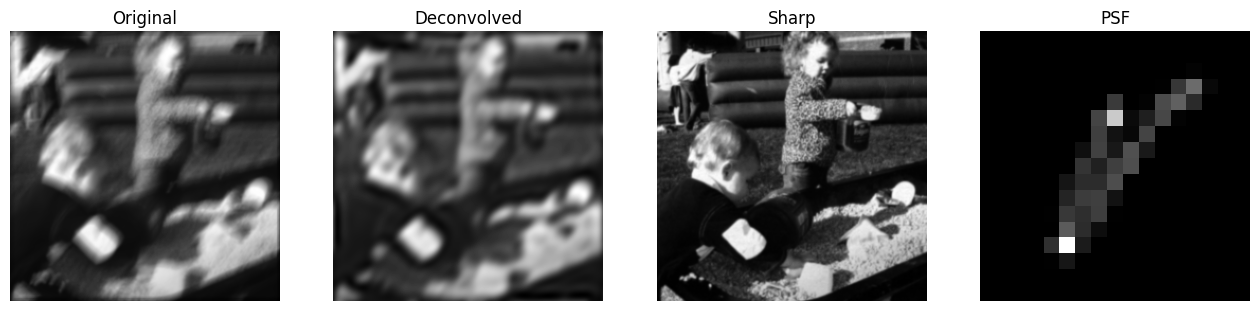

In [ ]:
deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_1,
    psf=psf_1,
    psf_true=psf_1,
    algorithm=restoration.wiener,
    balance=5,
)

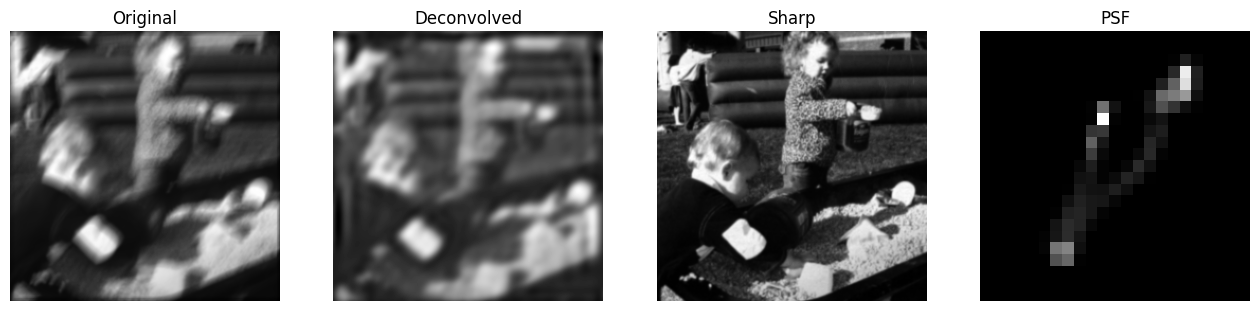

In [ ]:
deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_7,
    psf=psf_7,
    psf_true=psf_7,
    algorithm=restoration.wiener,
    balance=5,
)

### Incorrect PSF

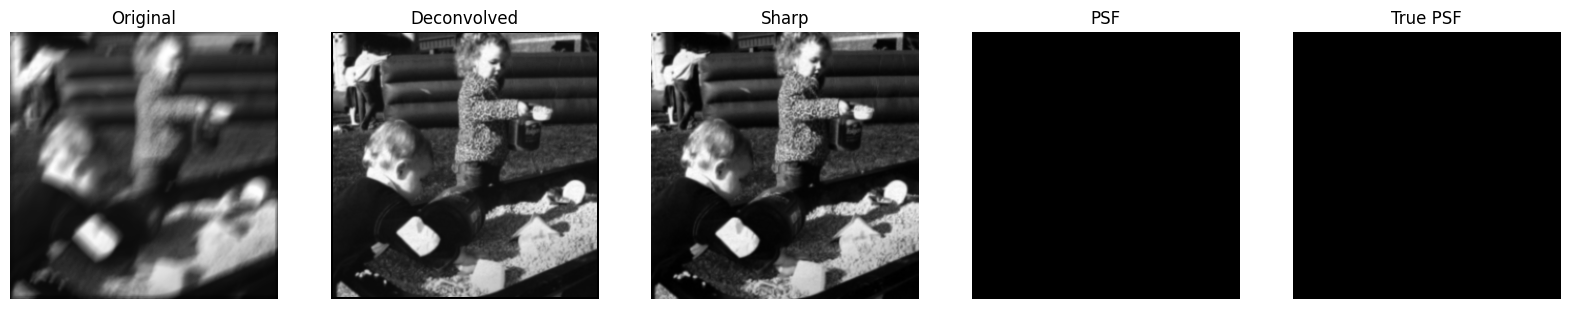

In [ ]:
deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_uniform3,
    psf=psf_uniform5,
    psf_true=psf_uniform3,
    algorithm=restoration.wiener,
    balance=0,
)

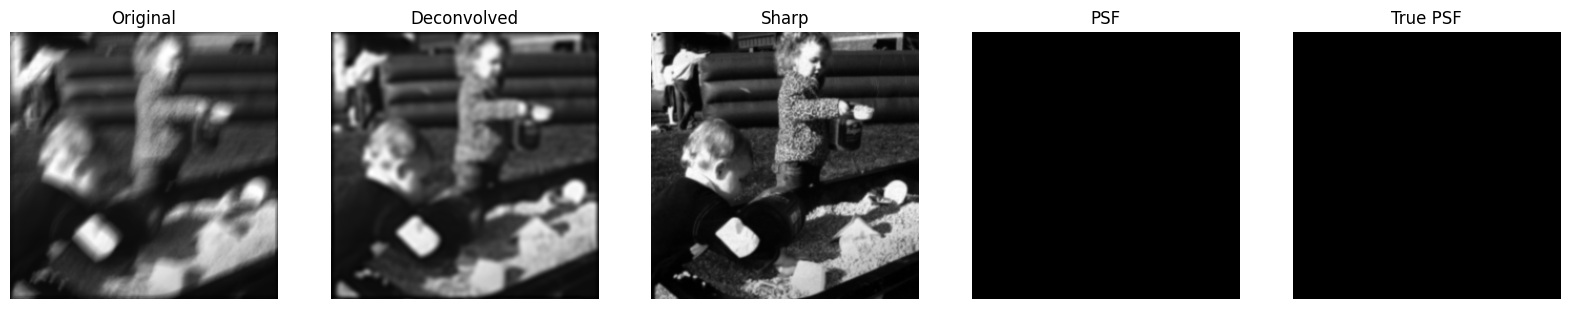

In [ ]:
psf_uniform5 = np.ones((5, 5)) / 25

blurred_uniform5 = conv2(x, psf_uniform5)

deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_uniform5,
    psf=psf_uniform3,
    psf_true=psf_uniform5,
    algorithm=restoration.wiener,
    balance=1,
)

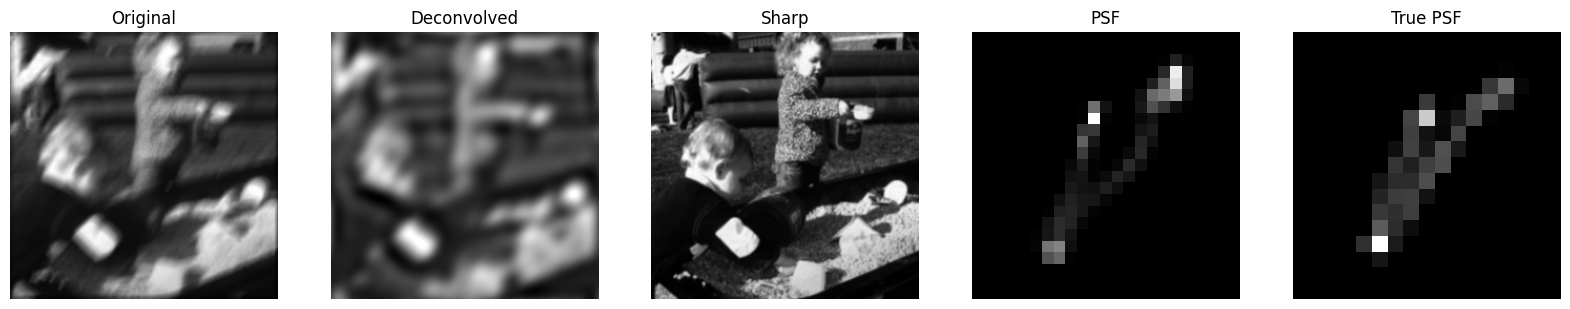

In [ ]:
deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_1,
    psf=psf_7,
    psf_true=psf_1,
    algorithm=restoration.wiener,
    balance=50,
)

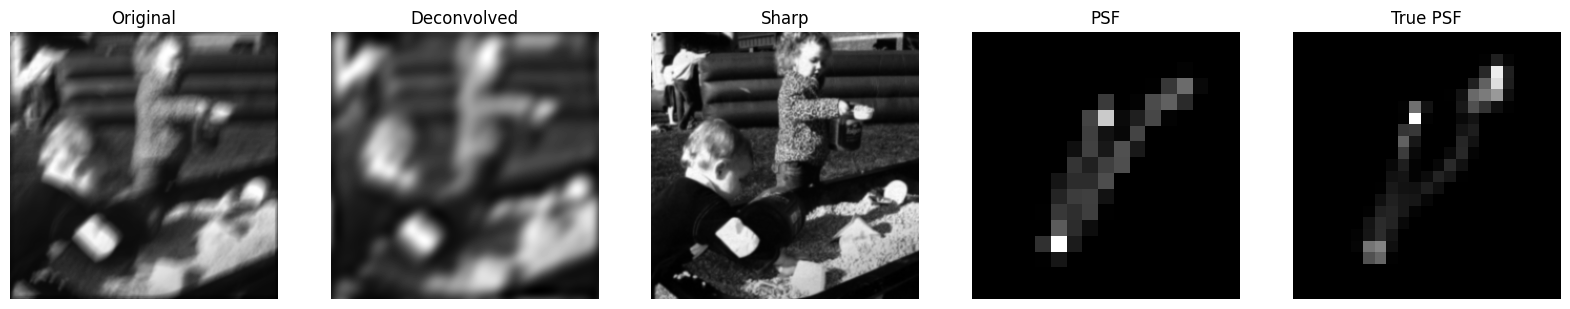

In [ ]:
deblur_and_show(
    sharp_image=x,
    blurred_image=blurred_7,
    psf=psf_1,
    psf_true=psf_7,
    algorithm=restoration.wiener,
    balance=50,
)

# 2 Neural models

## RGDN

In [1]:
import sys
sys.path.append('/home/chaganovaob/edu/neural-deconvolution/')

import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms.functional import resize

from src.deconv.neural.rgdn.model import OptimizerRGDN
from src.data.blurry_image_dataset import BlurryImageDatasetOnTheFly, get_data

plt.gray()

<Figure size 640x480 with 0 Axes>

In [2]:
def load_trained_model(model: nn.Module, ckpt_path: str) -> nn.Module:  
    checkpoint = torch.load(ckpt_path)
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    return model

In [3]:
rgdn = OptimizerRGDN(num_steps=10, is_rgb=False).cpu()
rgdn = load_trained_model(rgdn, ckpt_path='/home/chaganovaob/edu/neural-deconvolution/models/RGDN-GRAY-60')

In [4]:
_, valid_files, _ = get_data('/home/chaganovaob/edu/neural-deconvolution/datasets/Linnaeus 5 256X256', is_silent=False)
valid_dataset = BlurryImageDatasetOnTheFly(file_name_list=valid_files, is_rgb=False)
val_loader = DataLoader(valid_dataset, batch_size=4, shuffle=False)

y, x_gt, k, kt = next(iter(val_loader))

Files are loaded.
Train size:  6000 	 Valid size:  1000 	 Test size:  1000


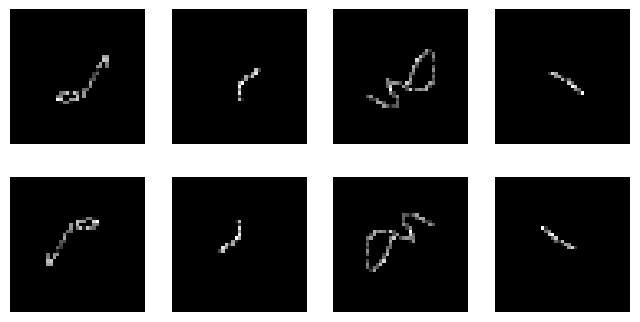

In [5]:
y, x_gt, k, kt = next(iter(val_loader))

fig, axs = plt.subplots(2, len(k), figsize=(8, 4))

for i in range(len(k)):
    axs[0, i].imshow(k[i][0])
    axs[0, i].axis('off')

    axs[1, i].imshow(kt[i][0])
    axs[1, i].axis('off')

## Correct PSF

In [6]:
x_restored = rgdn(y, k, kt)

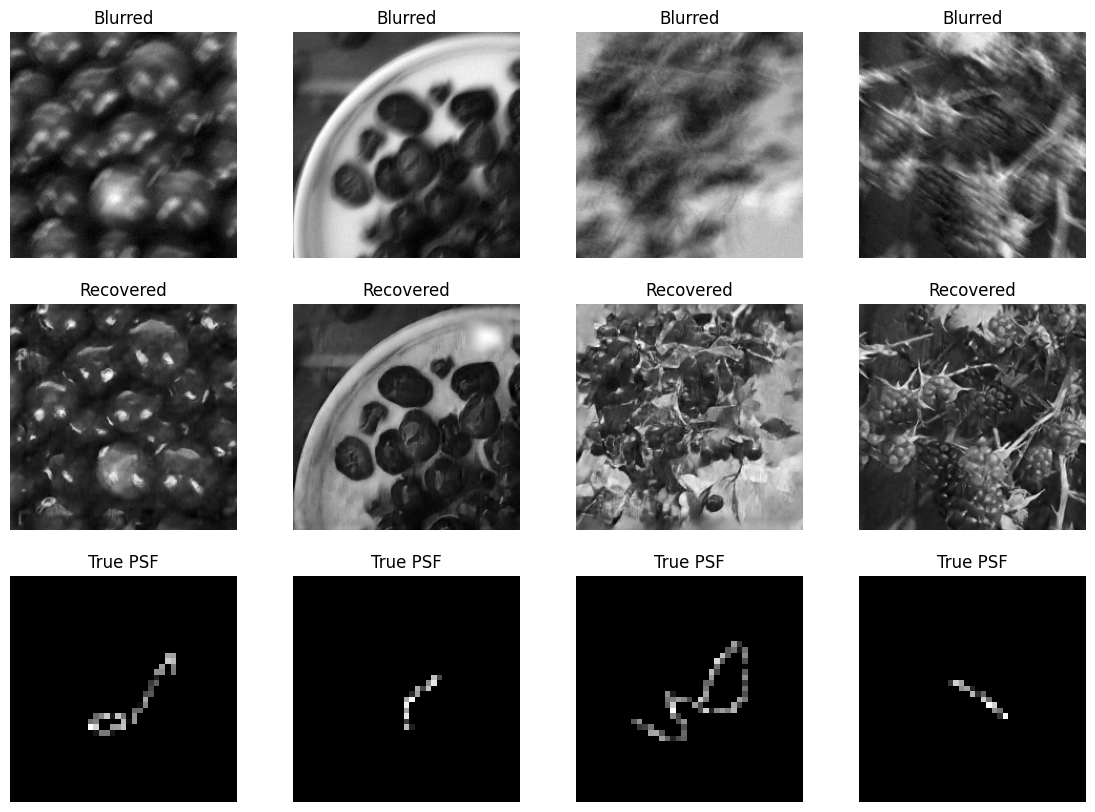

In [10]:
fig, axs = plt.subplots(3, len(k), figsize=(14, 10))

for i in range(len(k)):
    axs[0, i].imshow(y[i][0].detach())
    axs[0, i].axis('off')
    axs[0, i].set_title('Blurred')
    axs[1, i].imshow(x_restored[-1][i][0].detach())
    axs[1, i].axis('off')
    axs[1, i].set_title('Recovered')
    axs[2, i].imshow(k[i][0].detach())
    axs[2, i].axis('off')
    axs[2, i].set_title('True PSF')


## Incorrect PSF

Swap true PSF and mirrored PSF.

In [12]:
x_restored_incorrect = rgdn(y, kt, k)

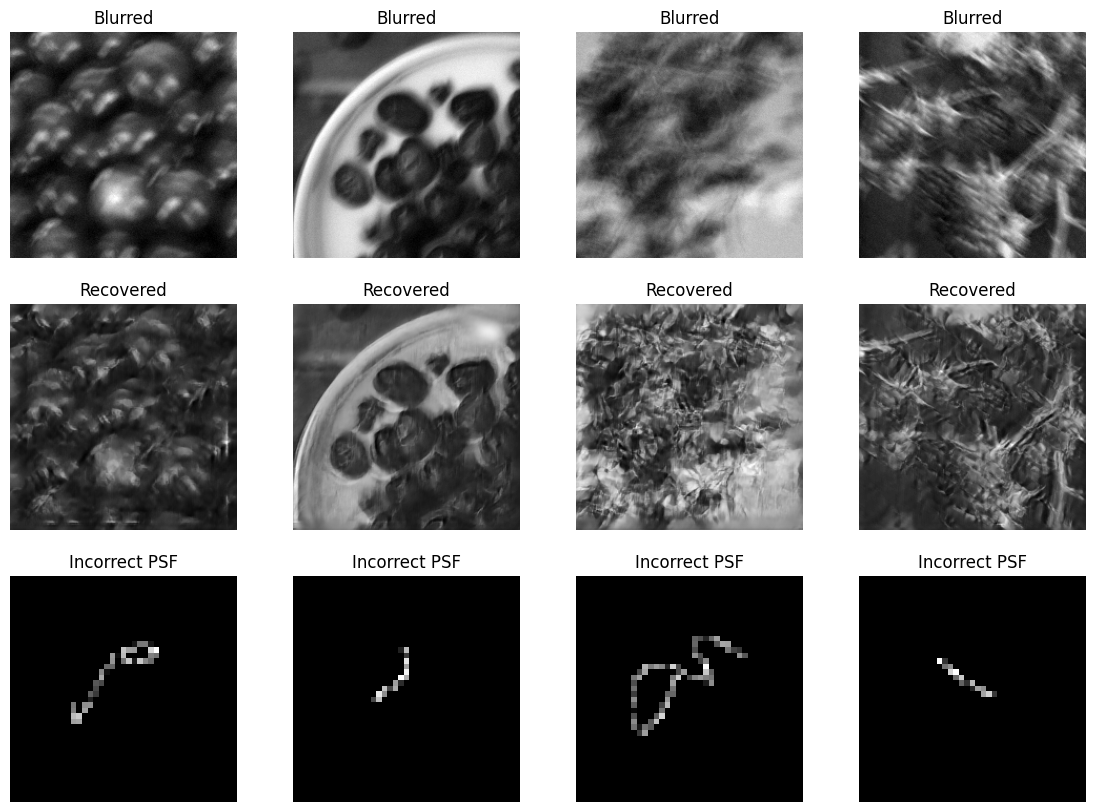

In [14]:
fig, axs = plt.subplots(3, len(k), figsize=(14, 10))

for i in range(len(k)):
    axs[0, i].imshow(y[i][0].detach())
    axs[0, i].axis('off')
    axs[0, i].set_title('Blurred')

    axs[1, i].imshow(x_restored_incorrect[-1][i][0].detach())
    axs[1, i].axis('off')
    axs[1, i].set_title('Recovered')
    
    axs[2, i].imshow(kt[i][0].detach())
    axs[2, i].axis('off')
    axs[2, i].set_title('Incorrect PSF')
